In [ ]:
#all imports
import torch #for neural networks
from torch import nn, optim #for neural network tools
from torchvision import datasets, transforms, models
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch.utils.data import DataLoader #to iterate dataset in batches
import matplotlib.pyplot as plt
import os


In [ ]:
#setting up device gpu/cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device) #model and data stored in this device

Using device: cpu


In [ ]:
#resizing images to 224x224 and converting to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)), #resize images to 224x224 (for mobilenet)
    transforms.ToTensor()            #convert images to tensor
])

In [ ]:
#load dataset
data_folder = r'D:\road_condition_prediction\datasets\potholes_dataset\Dataset'
#using ImageFolder to load images from directory
dataset = datasets.ImageFolder(root=data_folder, transform=transform) #loads images and is applying transform to each image



In [11]:
#create dataloader for easy batch processing
loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
#using pretrained mobilnet_v2 model
weights = MobileNet_V2_Weights.IMAGENET1K_V1 #pretrained weights
model = mobilenet_v2(weights=weights)
#outputs 2 classes (pothole, normal)
model.classifier[1] = nn.Linear(model.last_channel, 2)
#move model to cpu/gpu
model = model.to(device)

In [ ]:
#loss function and optimizer
criterion = nn.CrossEntropyLoss()  #how wrong model's predictions are for classification
optimizer = optim.Adam(model.parameters(), lr=0.001) #adjusts model weights to reduce loss

In [ ]:
#training loop
num_epochs = 3 #no. of times going through dataset

for epoch in range(num_epochs):
    total_loss = 0
    total_correct = 0
    
    for images, labels in loader: #iterating through batches
        images = images.to(device) #move images to cpu/gpu
        labels = labels.to(device) #move labels to cpu/gpu
        
        #clear prev gradients
        optimizer.zero_grad()
        
        #model predicts
        outputs = model(images)
        
        #compute loss for this batch
        loss = criterion(outputs, labels)
        
        #compute gradients and update weights
        loss.backward()
        optimizer.step()
        
        #total batch loss and accuracy
        total_loss += loss.item()
        total_correct += (outputs.argmax(1) == labels).sum().item()
    
    #print stats after each epoch
    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {total_loss/len(loader):.4f} | Accuracy: {total_correct/len(dataset):.4f}")

Epoch 1/3 | Loss: 0.1942 | Accuracy: 0.9369
Epoch 2/3 | Loss: 0.0790 | Accuracy: 0.9731
Epoch 3/3 | Loss: 0.1001 | Accuracy: 0.9623


In [19]:
#save trained model
save_path = r"D:\road_condition_prediction\results\pothole_model.pth"
torch.save(model.state_dict(), save_path)
print("Model saved to:", save_path)

Model saved to: D:\road_condition_prediction\results\pothole_model.pth


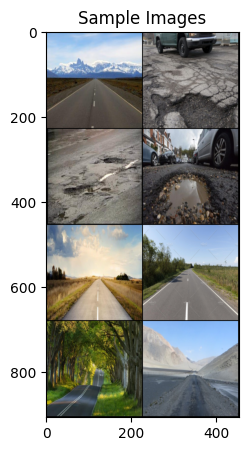

In [22]:
#displaying sample images
from torchvision.utils import make_grid
sample_imgs, sample_labels = next(iter(loader)) #gets first batch of images
grid = make_grid(sample_imgs[:8], nrow=2) #4 image grid
plt.figure(figsize=(5,5))
plt.imshow(grid.permute(1,2,0))  #reorder dimensions to display
plt.title("Sample Images")
plt.show()